Instructor: Dr. Somnath Dutta\
Affiliation: ASIAA, Taipei, Taiwan\
-- 2024 --

*This tutorial provides examples of various algorithms for supervised learning: K-nearest neighbour, Naive bayes, logistic  regression, support vector machine, neural network.*

`Decleration: This tutorial used materials from the web search, available books and other university's documents. All of the materials are not cited individually.  The material included here is for educational purpose only.  -Somnath Dutta`

This tutorial follows the "Machine Learning Course" syllabus of Stanford University
https://online.stanford.edu/courses/cs229-machine-learning,
Freecodecam: https://www.freecodecamp.org/ ,
Coursera: https://www.coursera.org/.


## Package Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Data Inspection
# #MAGIC Gamma Telescope data; available in the archive: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope
# reference:  Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.
# 1.  fLength:  continuous  # major axis of ellipse [mm]
# 2.  fWidth:   continuous  # minor axis of ellipse [mm]
# 3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
# 4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
# 5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
# 6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
# 7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
# 8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
# 9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
# 10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
# 11.  class:    g,h         # gamma (signal), hadron (background)

# g = gamma (signal):     12332
# h = hadron (background): 6688


cols = ["fLength", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()
#data.describe()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"].unique() # To find how many classes are there.

array(['g', 'h'], dtype=object)

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
#df["class"] = (df["class"] != "g").astype(int)
df.head()

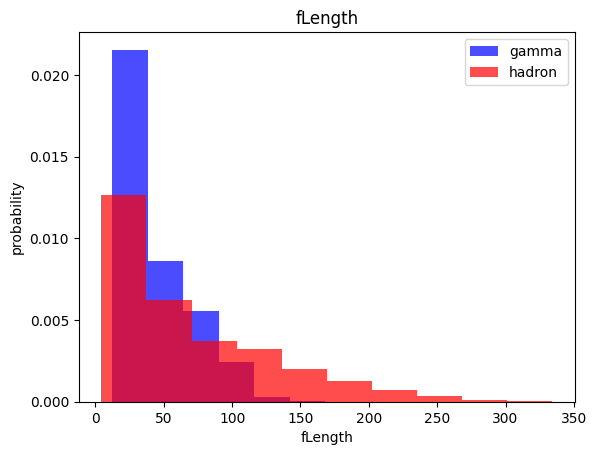

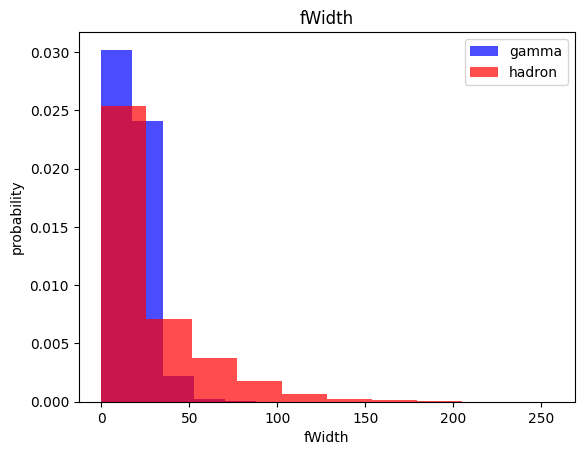

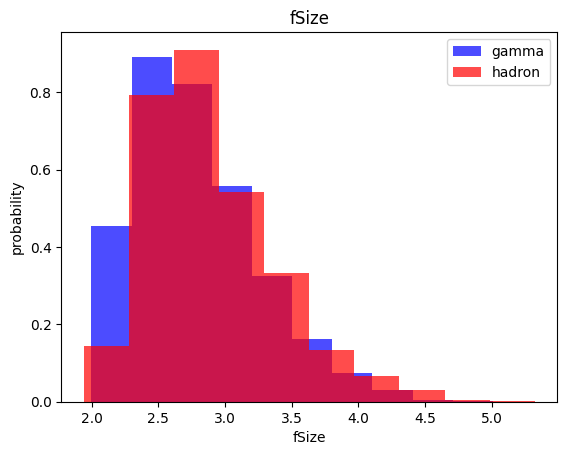

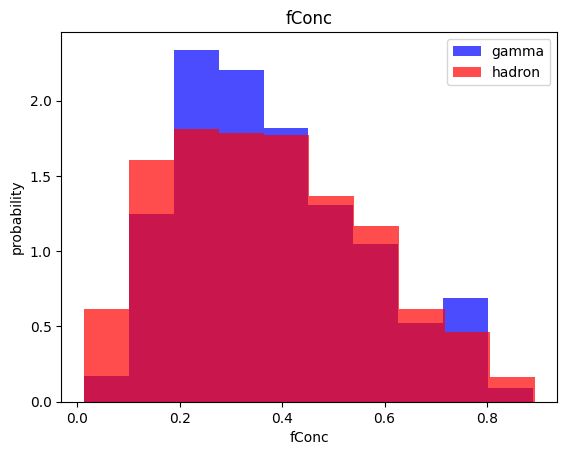

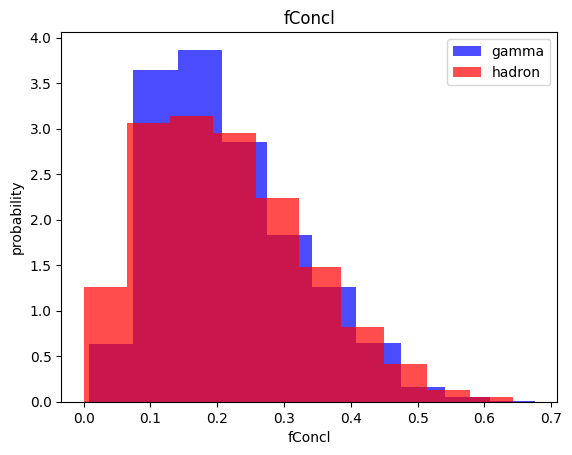

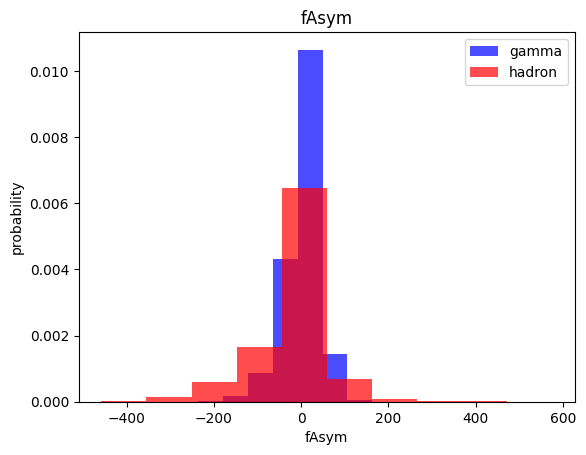

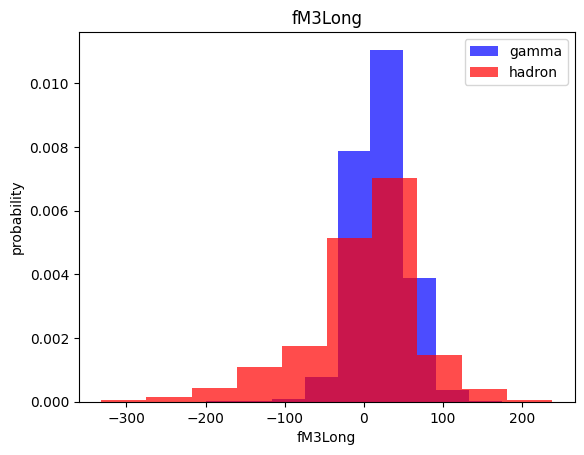

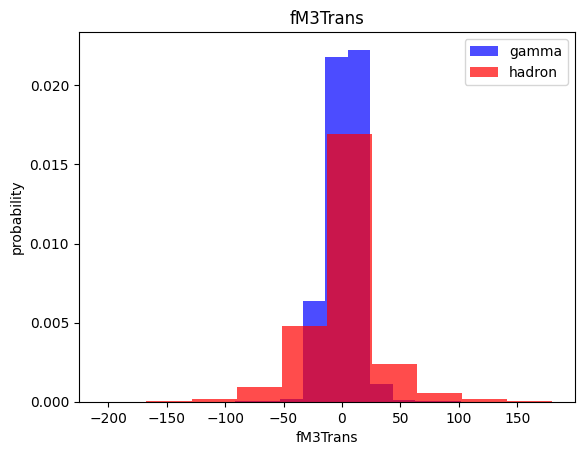

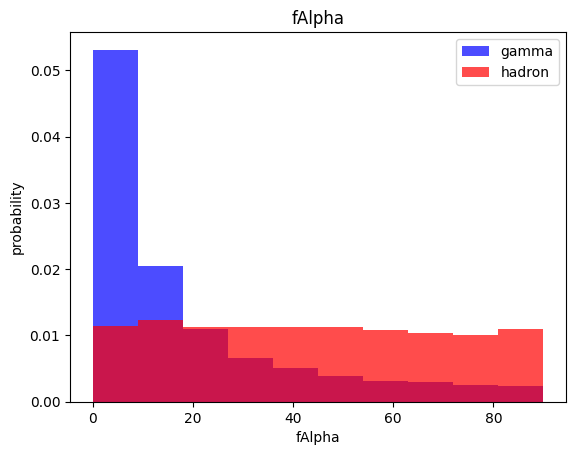

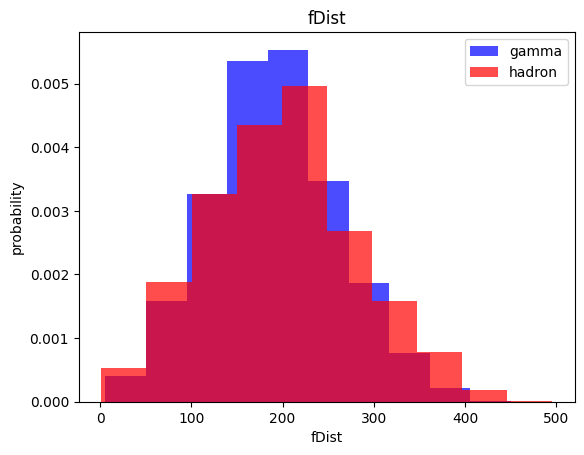

In [ ]:
for label in cols[:-1]: #upto the last item, excluding last item i.e. "class"
  plt.hist(df[df["class"]==1][label], color ='blue', label='gamma', alpha=0.7, density=True) #density True normalize
  plt.hist(df[df["class"]==0][label], color ='red', label='hadron', alpha=0.7, density=True) #density True normalize
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets
Data is plitted using numpy.split function.
Usually for large set, we separted as 60:20:20 for large datasets (.a few thousands data points).
But for small datasets (a few 100s points, we may need to reduce the validation and test data points to increase the "train" data points.

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) #frac = 1 suffle all data
#60 % train, 60 to 80% validation, 80-100% test

In [ ]:
# data cleaning or scaling data
#cmd+shift+L to edit two selection simultaneously : NOT working do:  option+click
def scale_datasets(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X) #take X and fit to standard scaller to X and transform all the values
  #It makes mean value ZERO and standard deviation 1 of whole data set. On otherwords, the data will be mean value subtracted.
  # It is important procedure to improve "outlier", but do not reject/remove outlier.


  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)


  data = np.hstack((X, np.reshape(y, (-1, 1))))  # stack side by side
  # X is 2D object; y is only a vector of values so y needs to be reshaped into 2D items
  #call np.reshape(y, (-1, 1)) => make a 2D array,  -1 means unspecified; here -1 is row of len(y)
  return data, X, y

In [ ]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron
#There are assymmentry in the data lengths, so we may need to overpopulated

7424
3988


In [ ]:
#There are assymmentry in the data lengths, so we may need to overpopulated using RandomOverSampler()

train, X_train, y_train = scale_datasets(train, oversample=True)

In [ ]:
len(y_train)

14848

In [ ]:
sum(y_train == 1)

7424

In [ ]:
sum(y_train == 0)

7424

In [ ]:
train, X_train, y_train = scale_datasets(train, oversample=True)
valid, X_valid, y_valid = scale_datasets(valid, oversample=False) # Not oversampling to check whether we should trust model
test, X_test, y_test = scale_datasets(test, oversample=False)
#option + click two select two line

#Need to run train-valid-test section again to remove the error


# data is now formatted

# Creating Models

### k-nearest neighbors (KNN)

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. KNN algorithm is a good choice if you have a small dataset and the data is noise free and labeled.

**
Assume an observation with set of features $X$ and $Y$ is a class label. For given data points, we need to find k-nearest neighbours. Given a positive integer  $k$,  $k$ -nearest neighbors looks at the  k observations closest to a test observation  $x_0$  and estimates the conditional probability that it belongs to class  $j$  using the formula:

$P(Y=j|X=x0)=\frac{1}{k}∑_{i∈N0}I(y_i=j)$

where  $N_0$  is the set of  $k$ -nearest observations and  $I(y_i=j)$  is an indicator variable that evaluates to $1$ if a given observation  $(x_i,y_i)$  in  $N_0$  is a member of class  $j$ , and $0$ if otherwise. After estimating these probabilities,  $k$ -nearest neighbors assigns the observation  $x_0$  to the class which the previous probability is the greatest.



In [ ]:
# KNN - K nearest neibour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=1) #check for different neighbour
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1319
           1       0.84      0.89      0.86      2485

    accuracy                           0.82      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.82      0.81      3804



# Naive Bayes

Consider a set of features denoted by X = (X1, X2, X3, .....Xn) i.e. n number of features. We need to find correct level Y.

We need to consider Y and X as random variables. Assume, X takes values (x1, x2, ....xn) and Y takes values y. P(Y=y|X=(x1, x2, ...xn))is a conditional probaility, means the probability of capital Y is y given X = the set (x1, x2 ...xn).  

We need to find the value of y for which P(Y|X) is maximum. But difficult so we need Bayes theorem. Which says:

$$
P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)}
$$
RHS can be found from the data sets. The P(Y|X) is called posterior. P(Y) is prior. P(X) is called evidence. P(X|Y) is called likelihood.
P(X) always remain the same.

Naive Bayes classifiers are a family of linear probabilistic classifiers, which assumes that the features are conditionally independent.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1319
           1       0.74      0.90      0.81      2485

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# Logistic Regresion

Logistic regression is used as a supervised machine learning algorithm that accomplishes binary classification tasks by predicting the probability of an outcome, event, or observation.

It delivers a binary outcome limited to two possiblities: yes/no, 0/1, or true/false.

Another name for the "logistic function" is a "sigmoid function" and is given by:

$$
F(x) = \frac{1}{1+e^{-x}}
     = \frac{e^x}{e^x+1}
$$

This function allows the logistic regression model to squeeze the values from $(-i,i)$ to $(0,1)$. Logistic regression is majorly used for binary classification tasks; however, it can be used for multiclass classification. The reason behind this is that just like Linear Regression, logistic regression starts from a linear equation.


Let us assume $p(x)$ be the linear function. However, the problem is that $p$ is the probability that should vary from $0$ to $1$ whereas $p(x)$ leads to an unbounded linear equation. To address this issue, consider $\log p(x)$ be a linear function of $x$. To bound it between a range of $(0,1)$, we will use $logit$ transformation.
$$
logit(p) = log (\frac{p(x)}{(1-p(x)})
$$
It transform probabilities from the unit interval to real line.
Next we will consider log p(x)/(1-p(x)) and make this function to be linear:
$$
log (\frac{p(x)}{(1-p(x)}) = 𝜭_0 + 𝜭_1x
$$

which gives,

$$
p(x) =  \frac{e^{𝜭_0 + 𝜭_1x}}{e^{𝜭_0 + 𝜭_1x}+1}
$$


 Logistic regression predicts probabilities, we can express it using likelihood. Say, for each training data point $x$, the predicted class is $y$. Probability of $y$ is either $p$ if $y=1$ or $1-p$ if $y=0$. Now, the likelihood can be expressed as:

 $$
 ℒ(𝜭) = 𝜫_{i=1}^n p(x^i)^{y^i} (1-p(x^i))^{1-y^i},
 where~ 𝜭 = 𝜭_0, 𝜭_1, ...
 $$
This function is the one we need to optimize and is called the likelihood function.
Now, We combine the products and take log-likelihood to simply it further
 $$
 l(𝜭) = \sum_{i=1}^n y^i\log p(x^i) + (1-y^i)\log (1-p(x^i)),
 where~   𝜭 = 𝜭_0, 𝜭_1, ...
 $$
Let's substitute p(x) with its exponent form, the final form of log-likelihood becomes:

$$
l(𝜭) = \sum_{i=1}^n y^i\log (\frac{1}{1+e^{-𝜭x^i}}) +  (1-y^i)\log (\frac{e^{-𝜭x^i}}{1+e^{-𝜭x^i}}),
$$

simplified as,
$$
l(𝜭) = \sum_{i=1}^n y^i𝜭x^i - \log (1+e^{-𝜭x^i})
$$

`Maximizing Log-likelihood function:` The goal here is to find the value of 𝜭 that maximizes the log-likelihood function. There are many methods to do so like\
Fixed-point iteration\
Bisection method\
Newton-raphson method\
Muller's method

Here, we use

$\frac{𝛅l}{𝛅𝜭} = 0$, to find the maximum value.


In [ ]:
#### Sigmoid function#

from sklearn.linear_model import LogisticRegression


In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1319
           1       0.85      0.83      0.84      2485

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Support Vector Machines

In [ ]:
# We care here margin or boundary

from sklearn.svm import SVC

In [ ]:
svm_model=  SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1319
           1       0.90      0.89      0.90      2485

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [ ]:
# Activation Function


# TensorFlow: open source neural network library
import tensorflow as tf

In [ ]:
def plot_history(history, title=None):
    # summarize history for accuracy
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
    if not isinstance(history, dict):
        history = history.history

    ax1.plot(history['accuracy'])
    ax1.plot(history['val_accuracy'])
    if title is not None:
      ax1.title(title)
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    #ax1.legend(['Training', 'Verification'], loc=0)


    if not isinstance(history, dict):
        history = history.history

    ax2.plot(history['loss'])
    ax2.plot(history['val_loss'])
    if title is not None:
        ax2.title(title)
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training', 'Verification'], loc=0)
    plt.show()


In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential((
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation= 'sigmoid')
  ))


  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )

  return nn_model, history

#nn_model.compile(optimizer='adam', loss='binary_crossentropy',
#                 metrics=['accuracy'])

16 nodes,  dropout 0, lr0.1, batch size 32


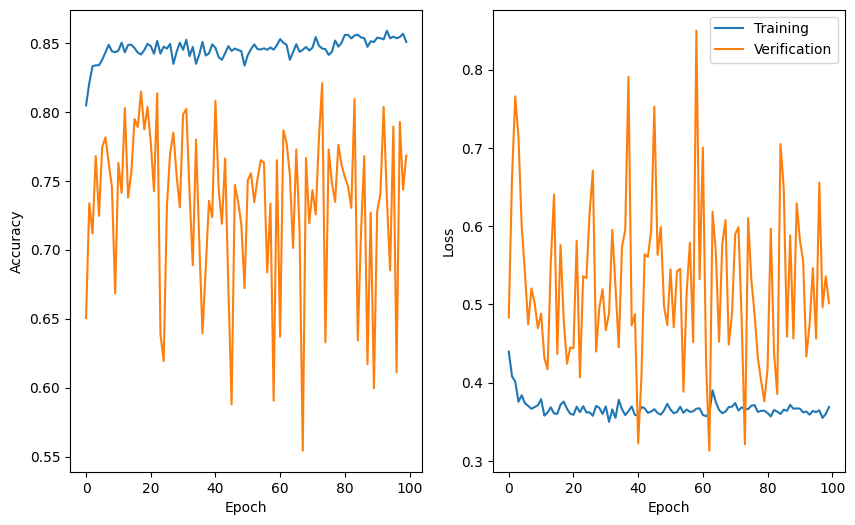

119/119 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8507
16 nodes,  dropout 0, lr0.1, batch size 64


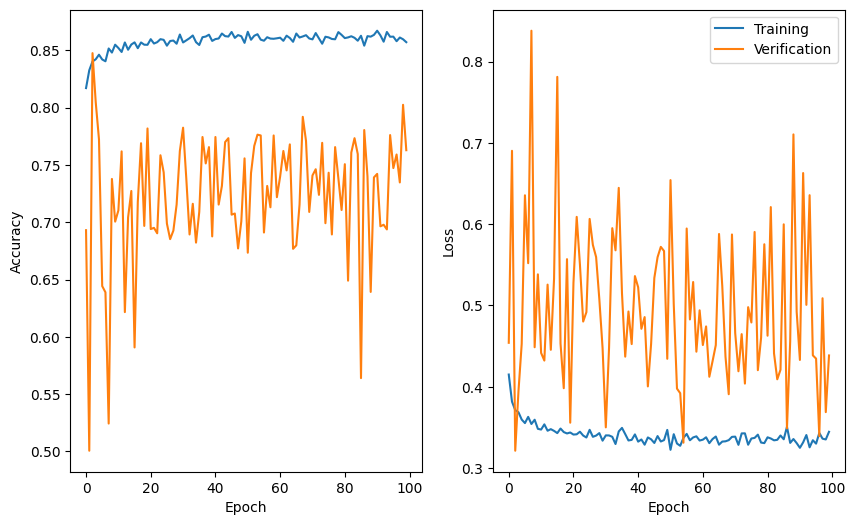

119/119 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8607
16 nodes,  dropout 0, lr0.1, batch size 128


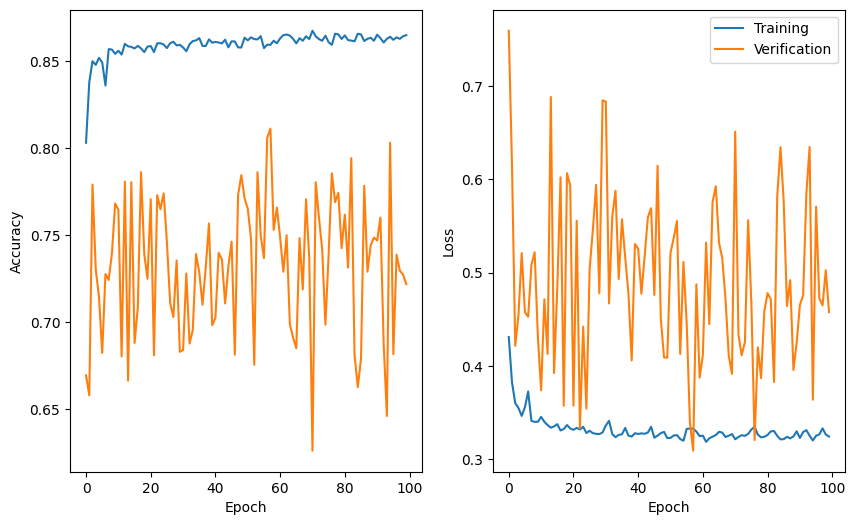

119/119 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8649
16 nodes,  dropout 0, lr0.005, batch size 32


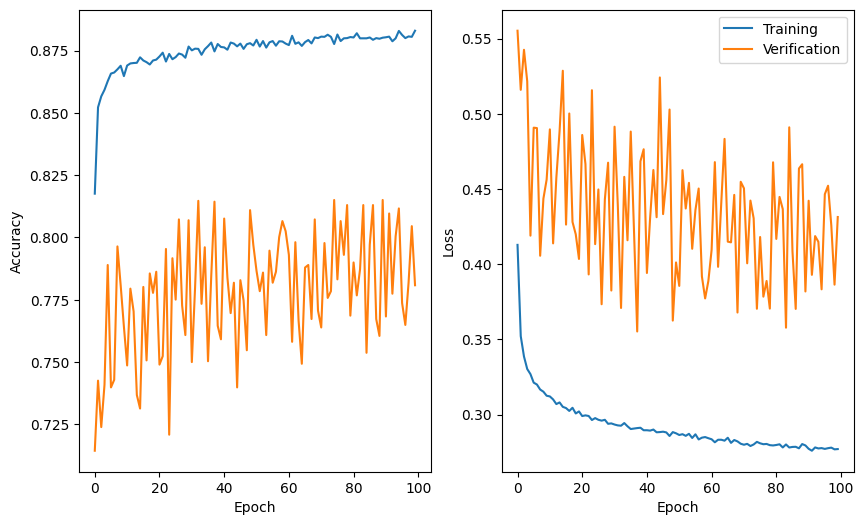

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8651
16 nodes,  dropout 0, lr0.005, batch size 64


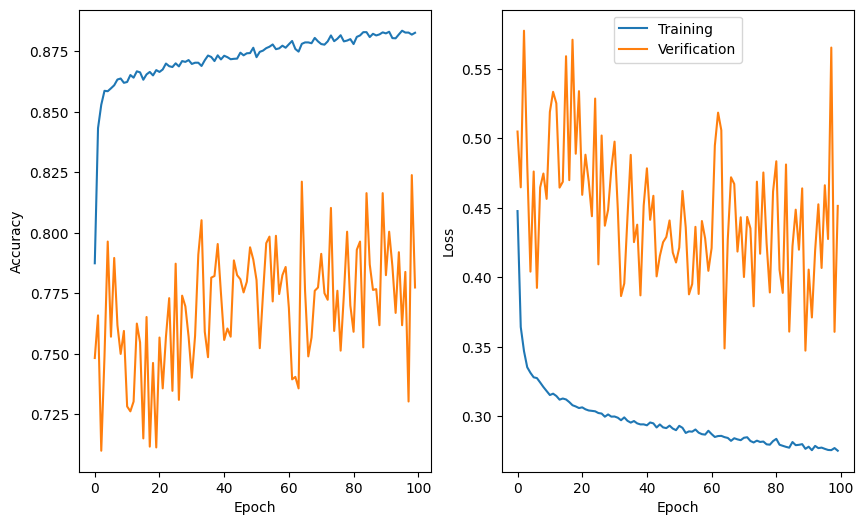

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8665
16 nodes,  dropout 0, lr0.005, batch size 128


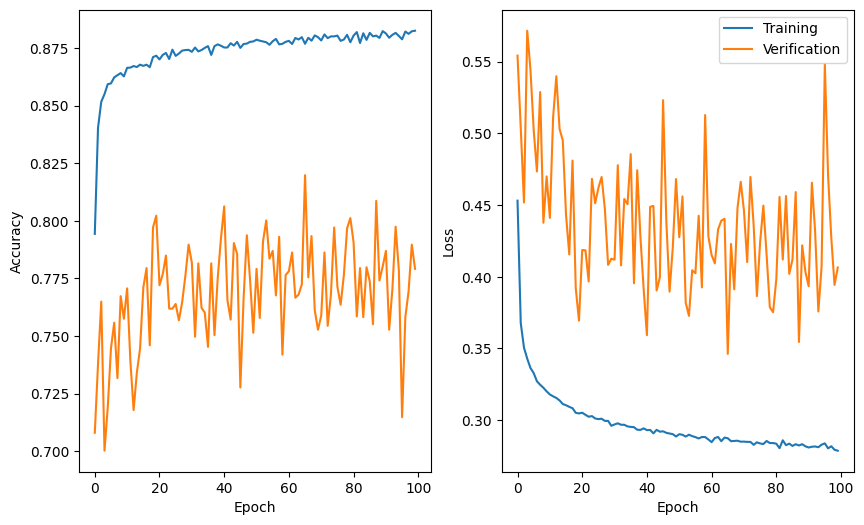

119/119 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8675
16 nodes,  dropout 0, lr0.001, batch size 32


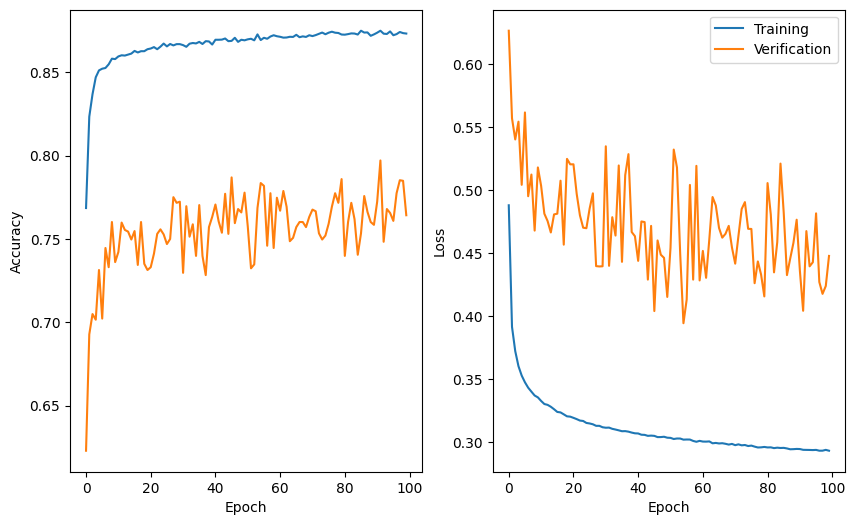

119/119 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8683
16 nodes,  dropout 0, lr0.001, batch size 64


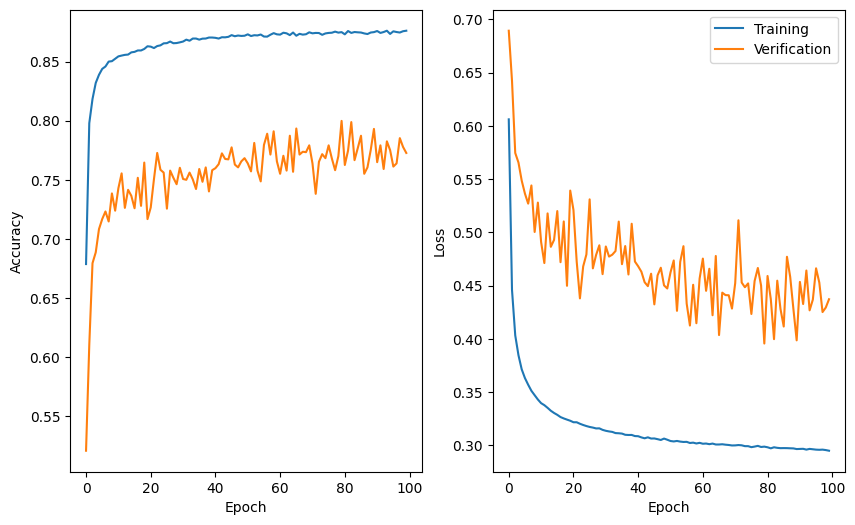

119/119 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8693
16 nodes,  dropout 0, lr0.001, batch size 128


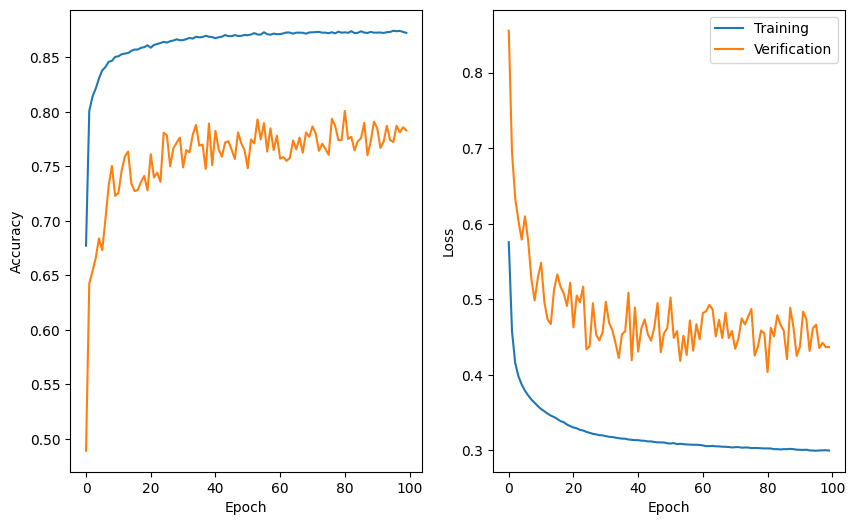

119/119 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8672
16 nodes,  dropout 0.2, lr0.1, batch size 32


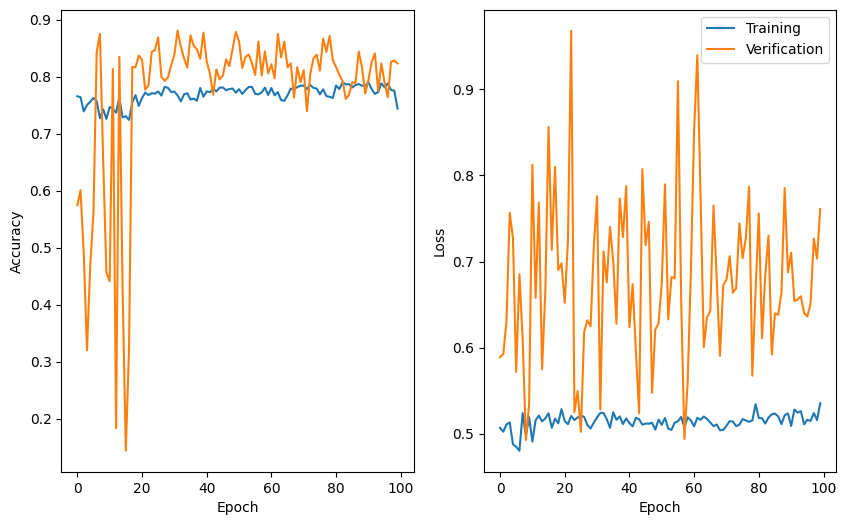

119/119 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8060
16 nodes,  dropout 0.2, lr0.1, batch size 64


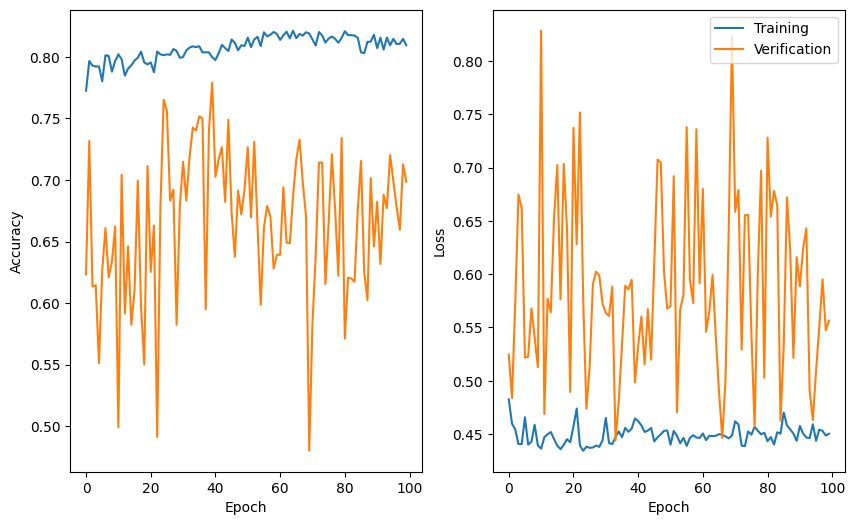

119/119 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8491
16 nodes,  dropout 0.2, lr0.1, batch size 128


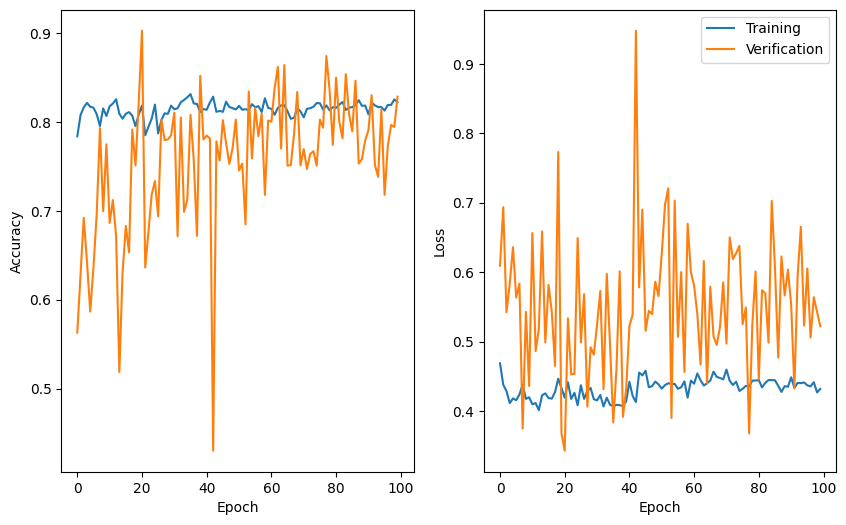

119/119 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8265
16 nodes,  dropout 0.2, lr0.005, batch size 32


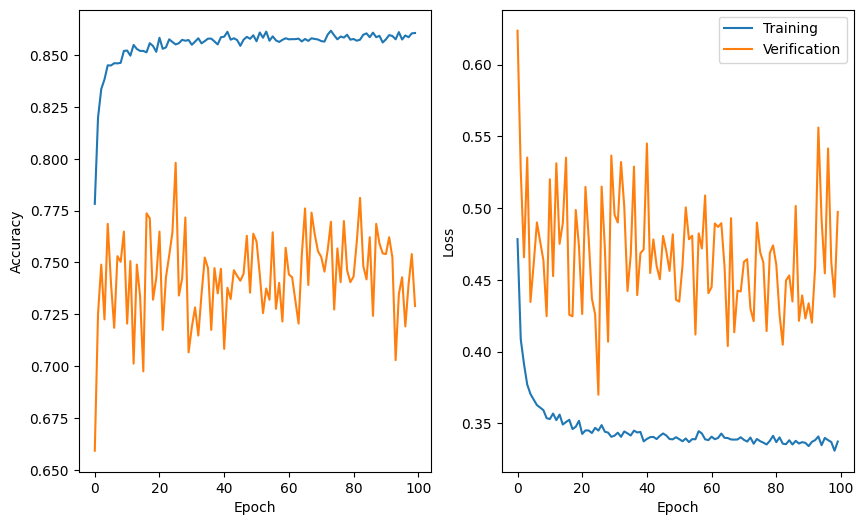

119/119 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8707
16 nodes,  dropout 0.2, lr0.005, batch size 64


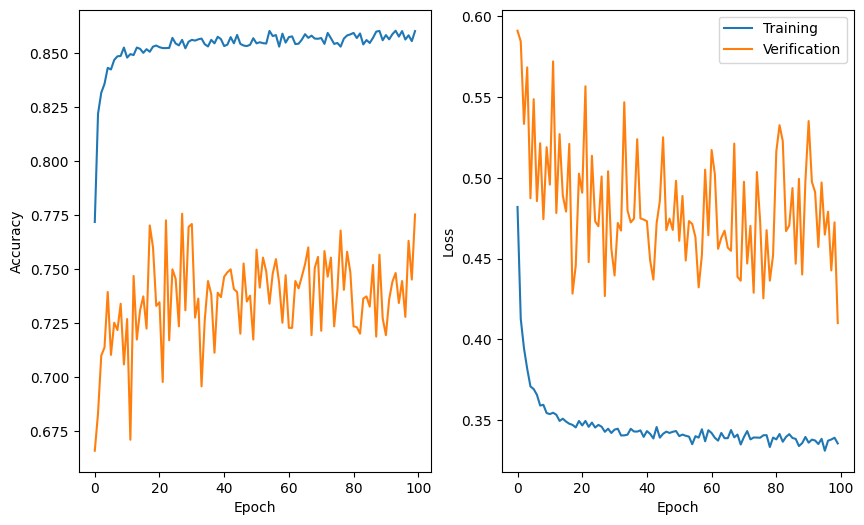

119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8630
16 nodes,  dropout 0.2, lr0.005, batch size 128


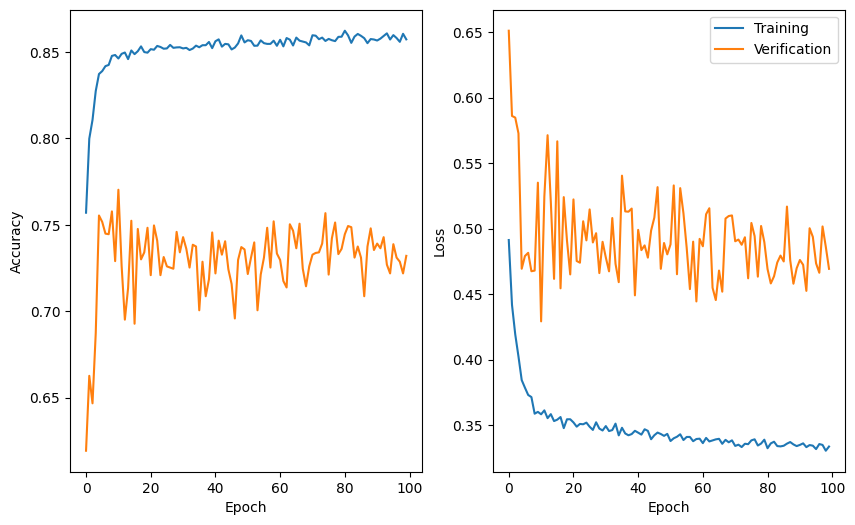

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8662
16 nodes,  dropout 0.2, lr0.001, batch size 32


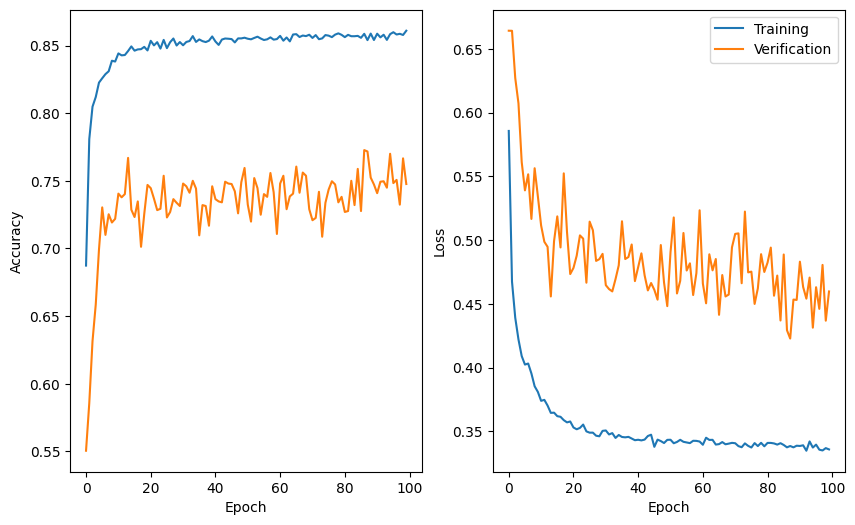

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8678
16 nodes,  dropout 0.2, lr0.001, batch size 64


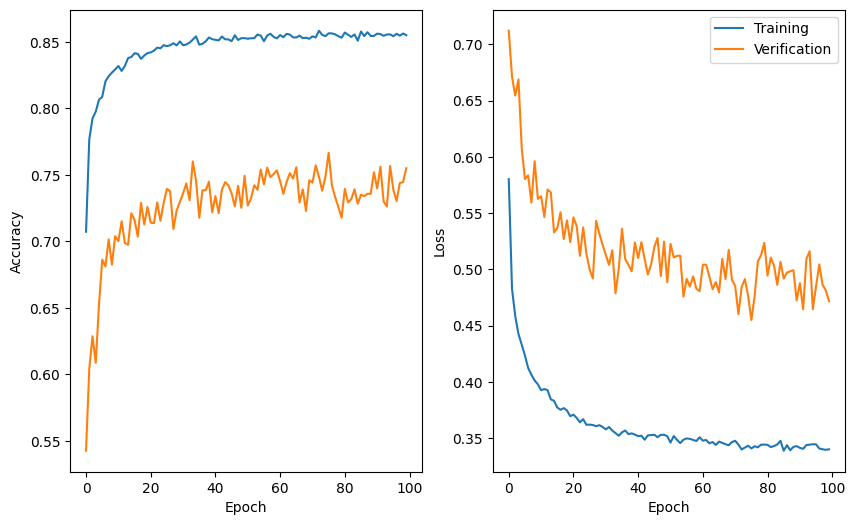

119/119 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8654
16 nodes,  dropout 0.2, lr0.001, batch size 128


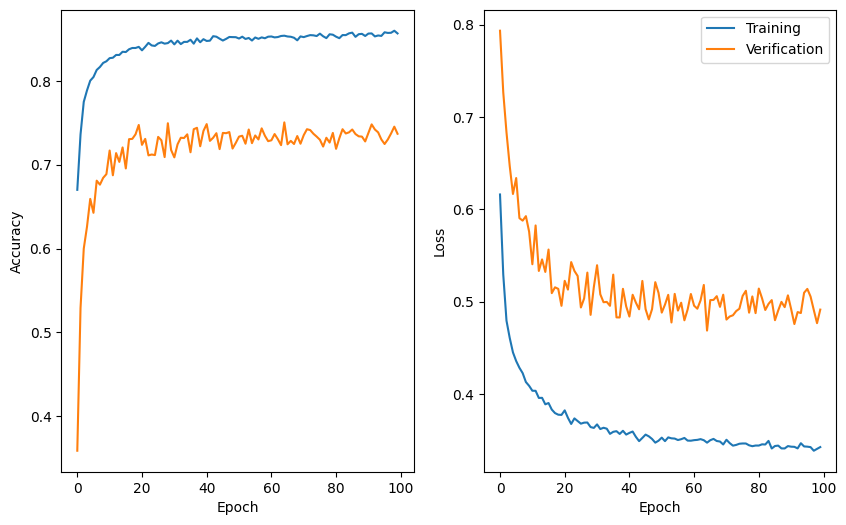

119/119 [==============================] - 0s 2ms/step - loss: 0.3229 - accuracy: 0.8607
32 nodes,  dropout 0, lr0.1, batch size 32


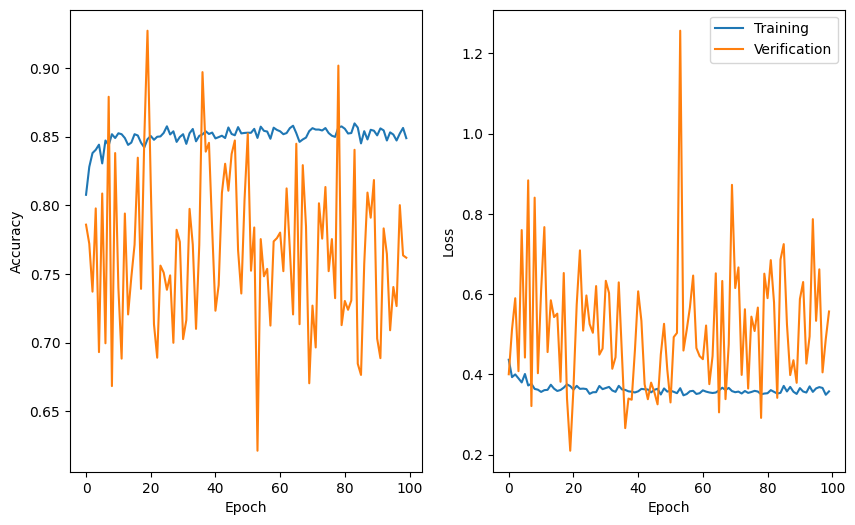

119/119 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8591
32 nodes,  dropout 0, lr0.1, batch size 64


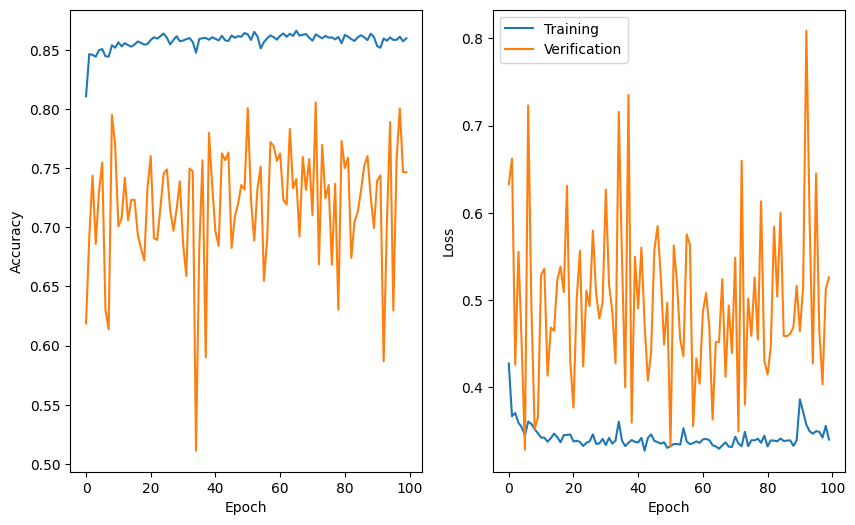

119/119 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8575
32 nodes,  dropout 0, lr0.1, batch size 128


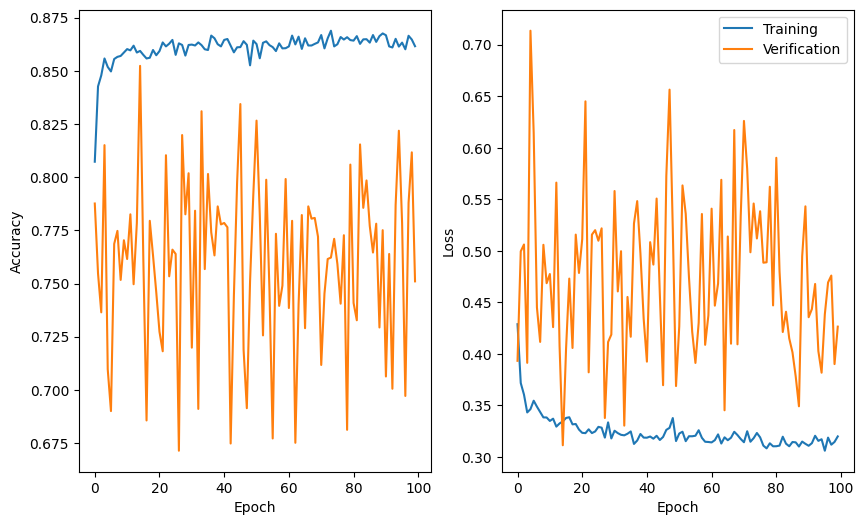

119/119 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8623
32 nodes,  dropout 0, lr0.005, batch size 32


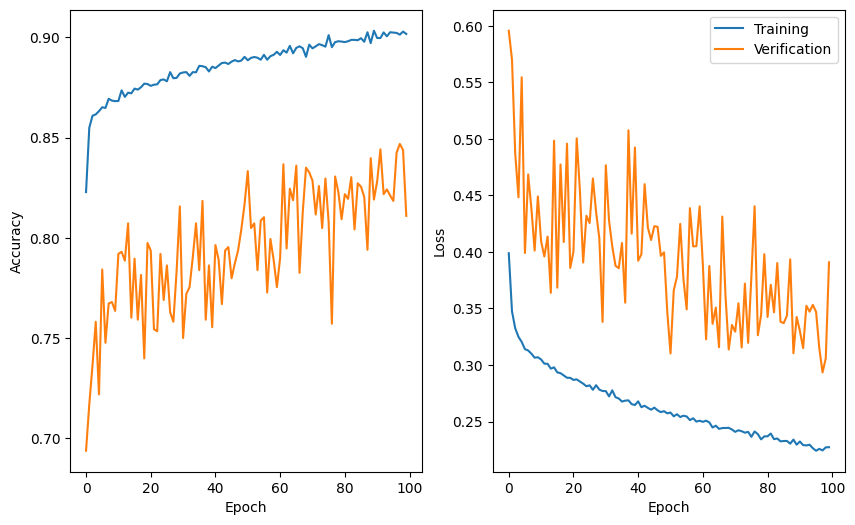

119/119 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8680
32 nodes,  dropout 0, lr0.005, batch size 64


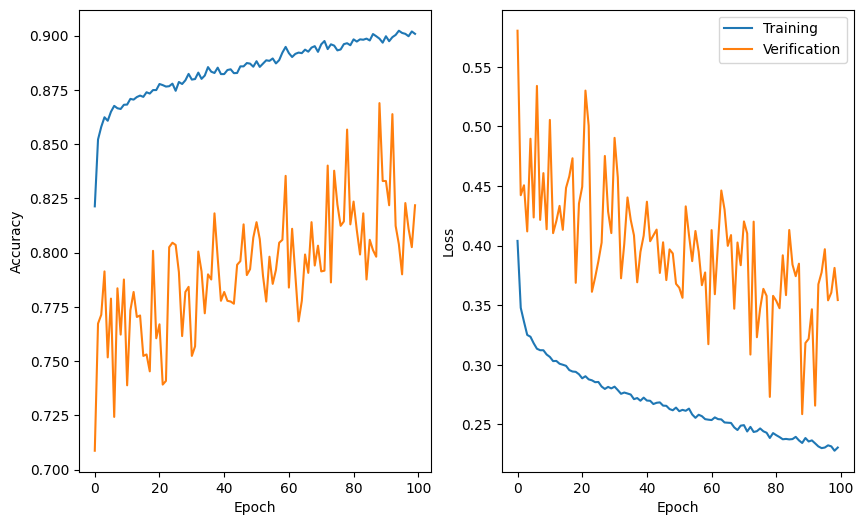

119/119 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8628
32 nodes,  dropout 0, lr0.005, batch size 128


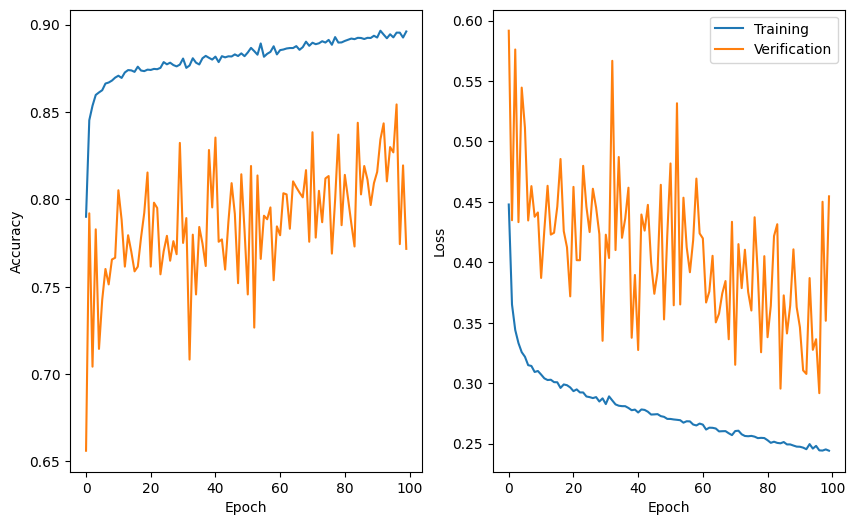

119/119 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8704
32 nodes,  dropout 0, lr0.001, batch size 32


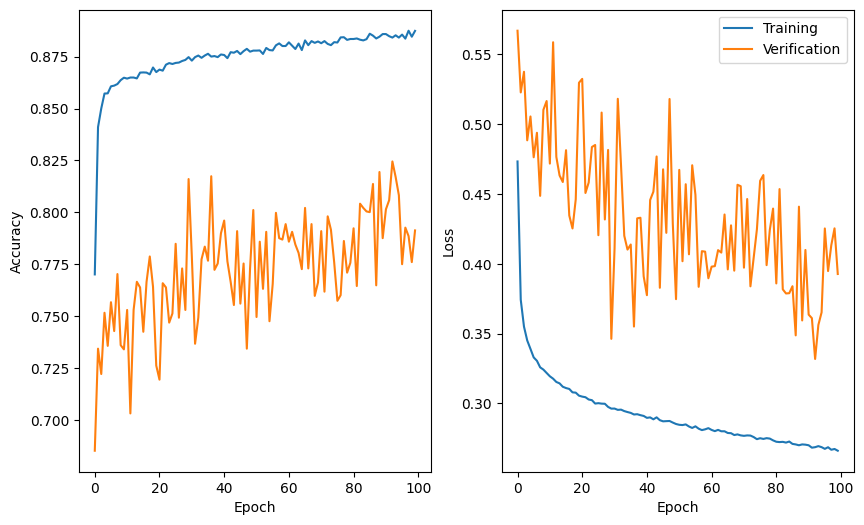

119/119 [==============================] - 0s 2ms/step - loss: 0.3195 - accuracy: 0.8633
32 nodes,  dropout 0, lr0.001, batch size 64


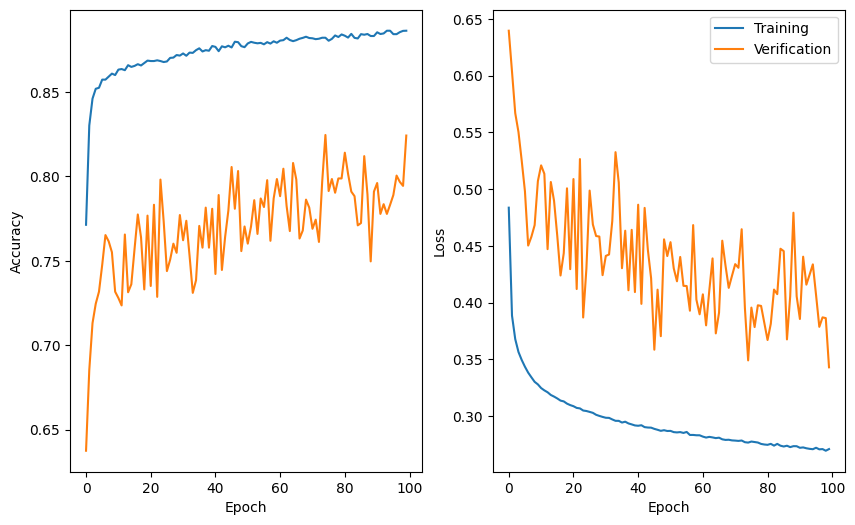

119/119 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8630
32 nodes,  dropout 0, lr0.001, batch size 128


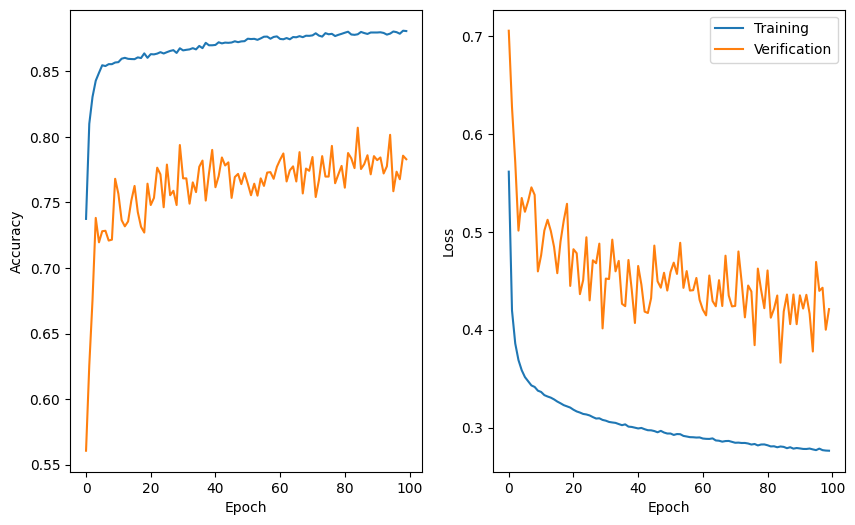

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8672
32 nodes,  dropout 0.2, lr0.1, batch size 32


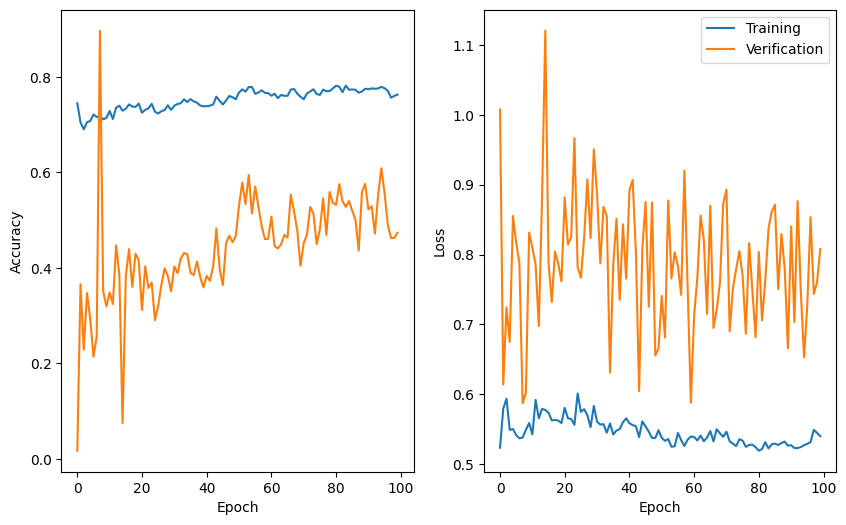

119/119 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.8044
32 nodes,  dropout 0.2, lr0.1, batch size 64


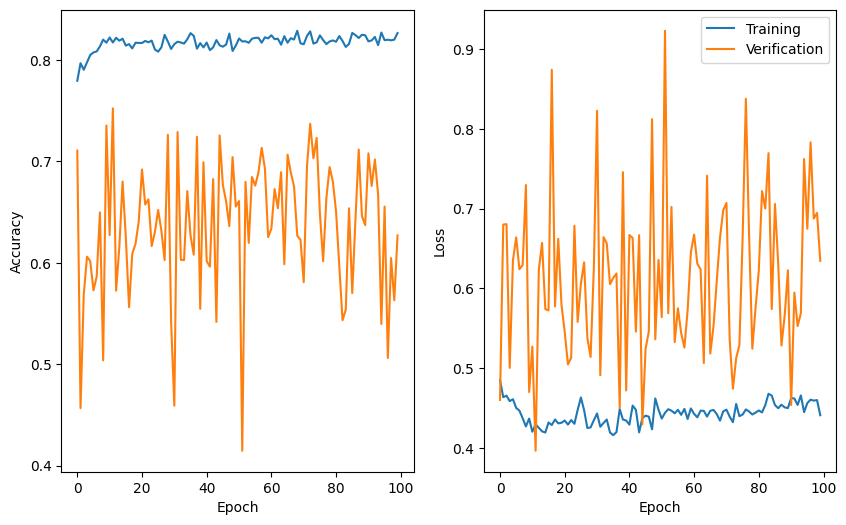

119/119 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8509
32 nodes,  dropout 0.2, lr0.1, batch size 128


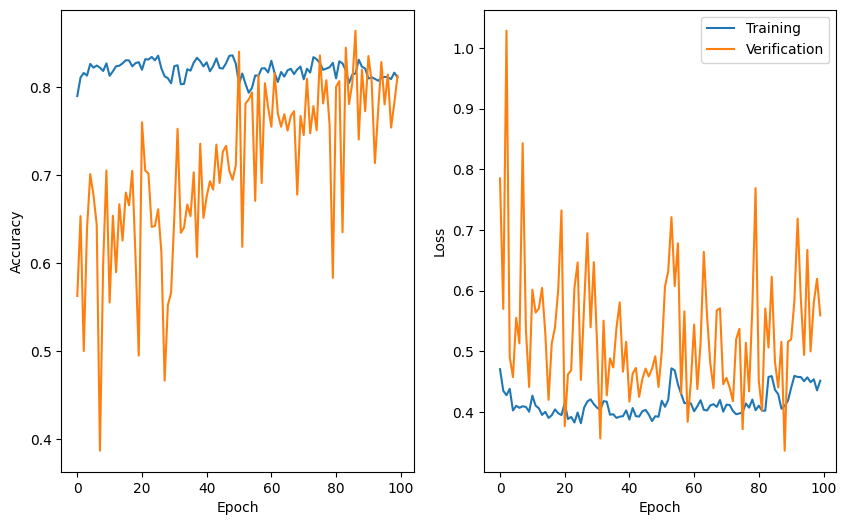

119/119 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8299
32 nodes,  dropout 0.2, lr0.005, batch size 32


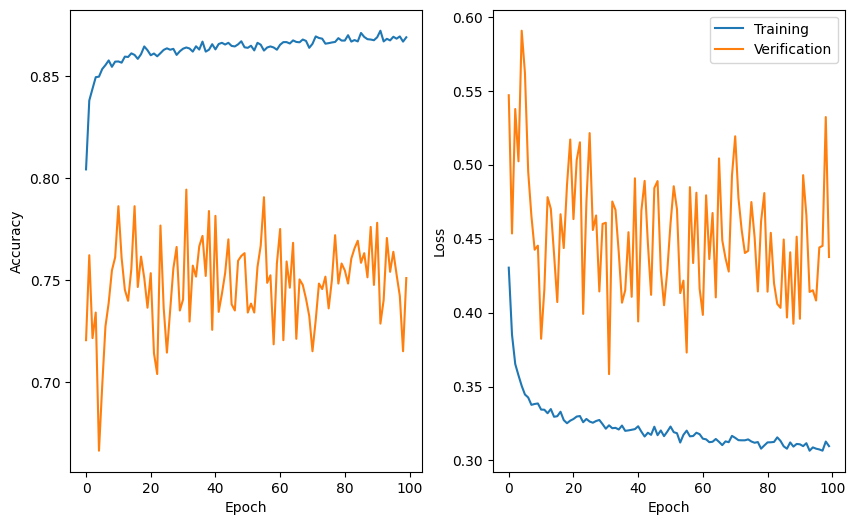

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8733
32 nodes,  dropout 0.2, lr0.005, batch size 64


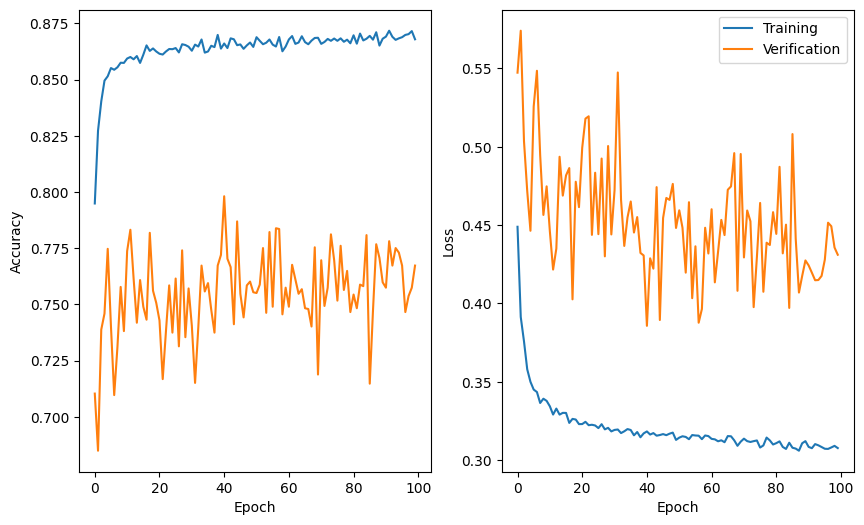

119/119 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8691
32 nodes,  dropout 0.2, lr0.005, batch size 128


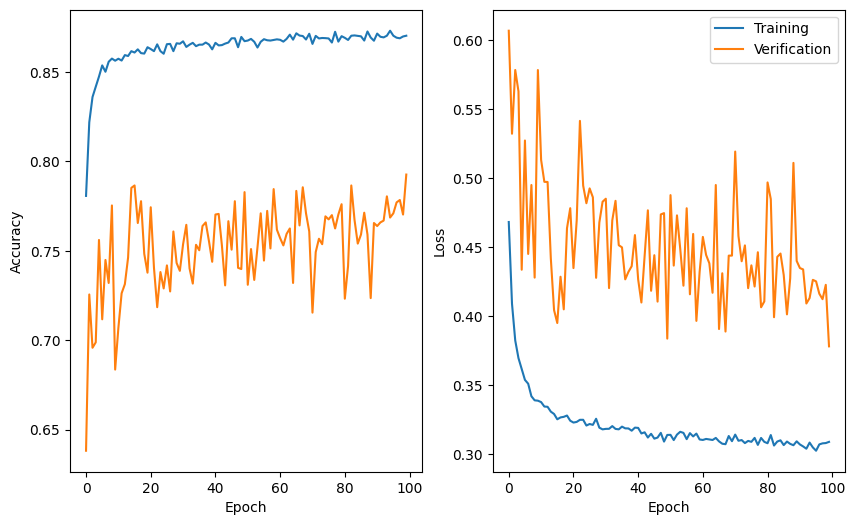

119/119 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8704
32 nodes,  dropout 0.2, lr0.001, batch size 32


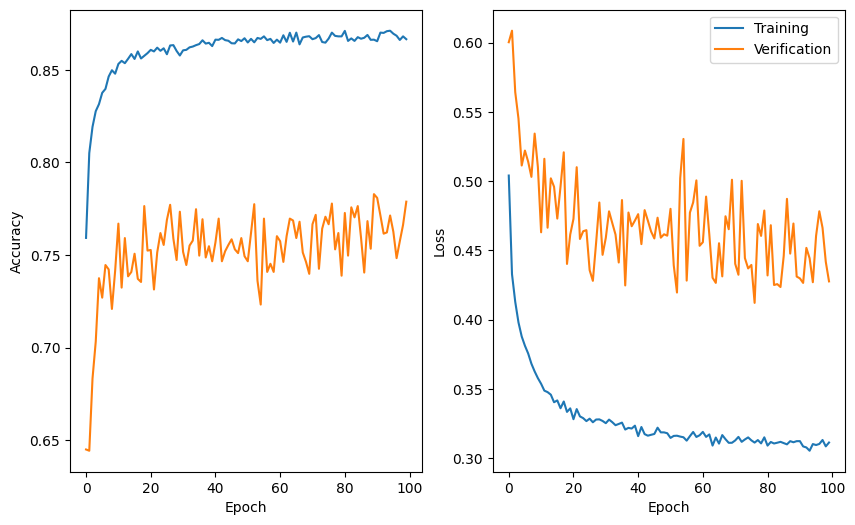

119/119 [==============================] - 0s 2ms/step - loss: 0.3052 - accuracy: 0.8701
32 nodes,  dropout 0.2, lr0.001, batch size 64


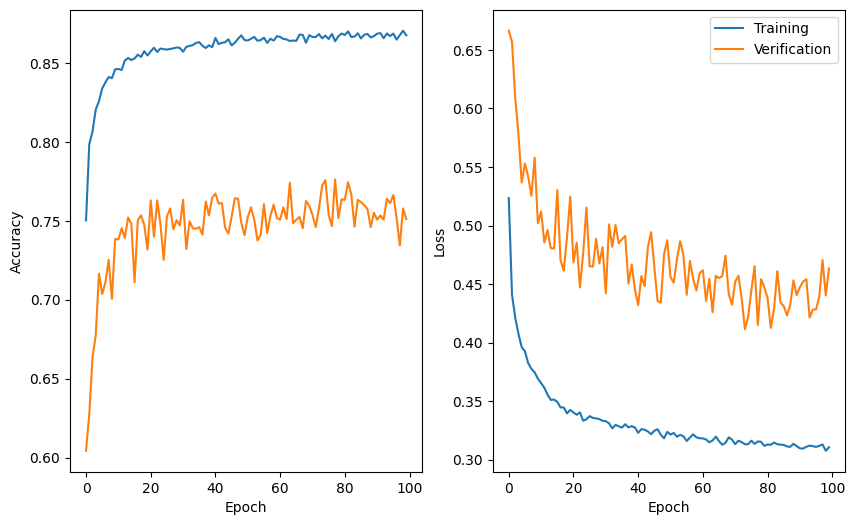

119/119 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8715
32 nodes,  dropout 0.2, lr0.001, batch size 128


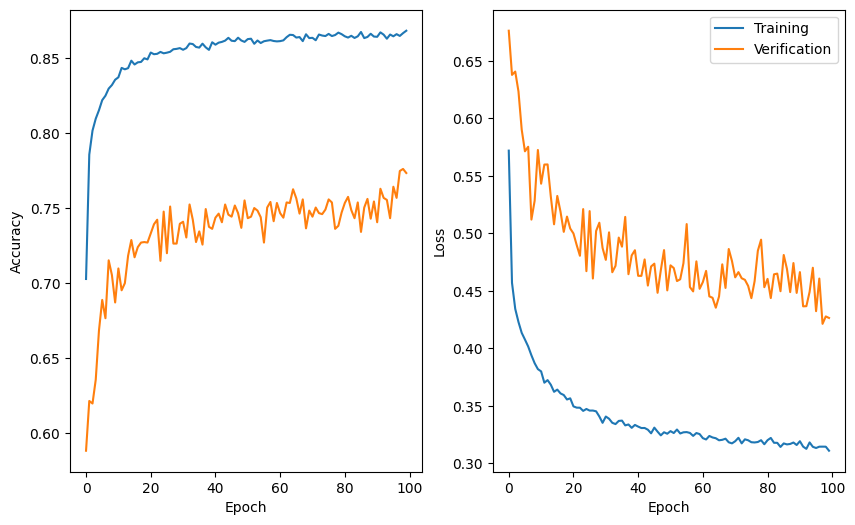

119/119 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8646
64 nodes,  dropout 0, lr0.1, batch size 32


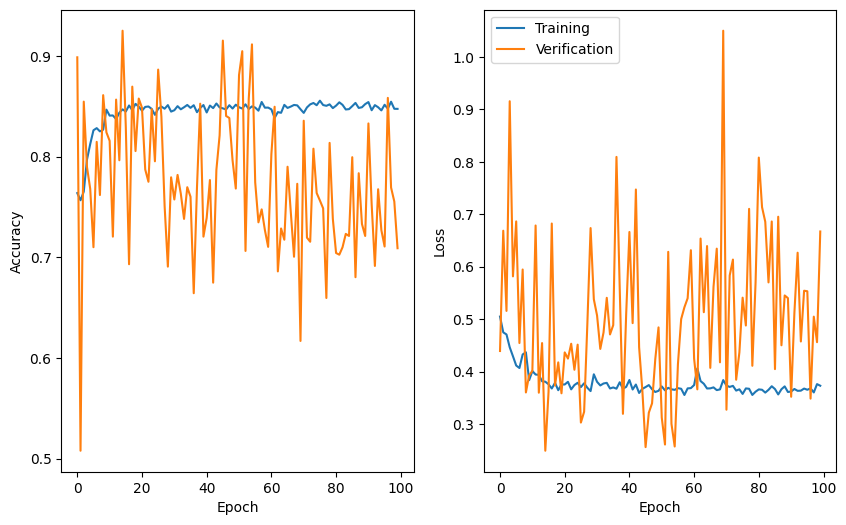

119/119 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8588
64 nodes,  dropout 0, lr0.1, batch size 64


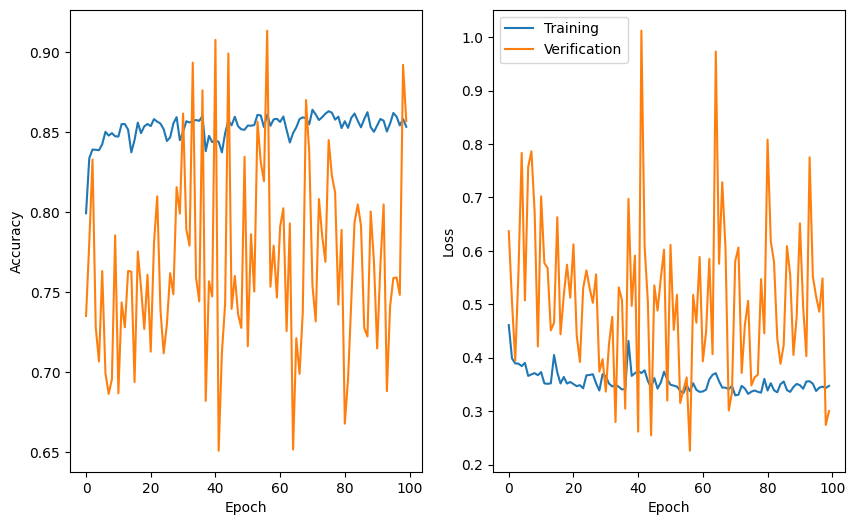

119/119 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8128
64 nodes,  dropout 0, lr0.1, batch size 128


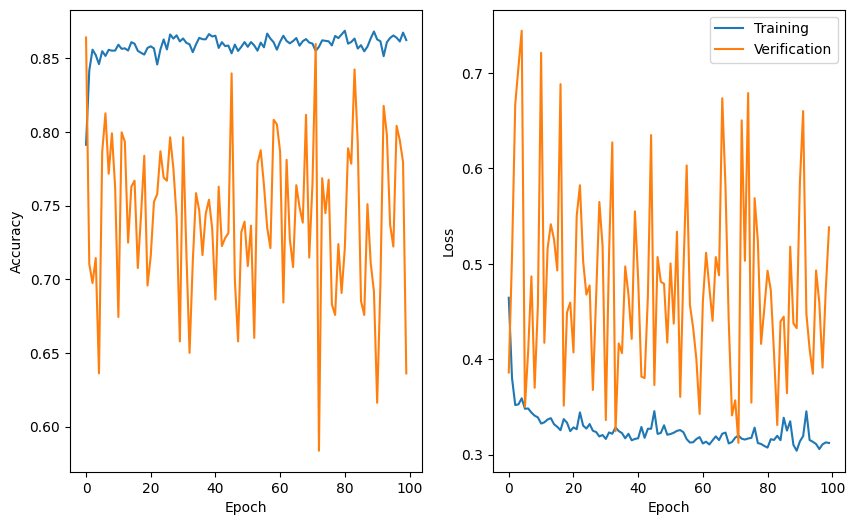

119/119 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8533
64 nodes,  dropout 0, lr0.005, batch size 32


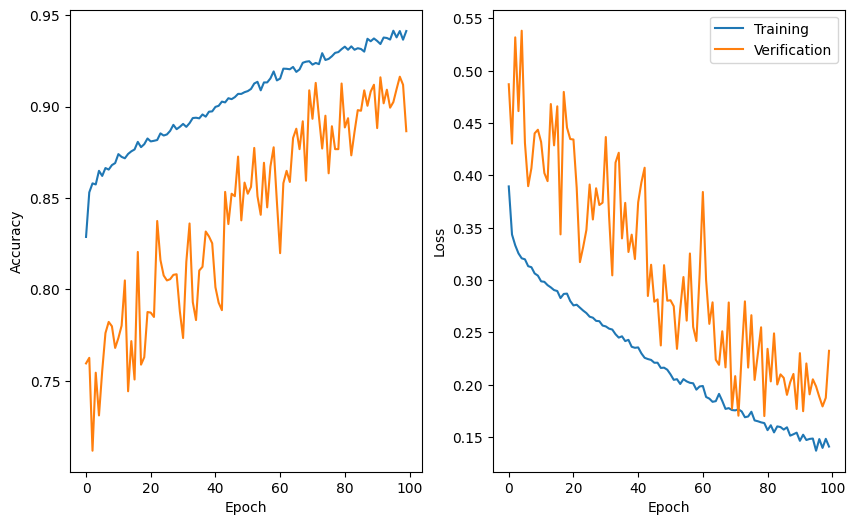

119/119 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.8588
64 nodes,  dropout 0, lr0.005, batch size 64


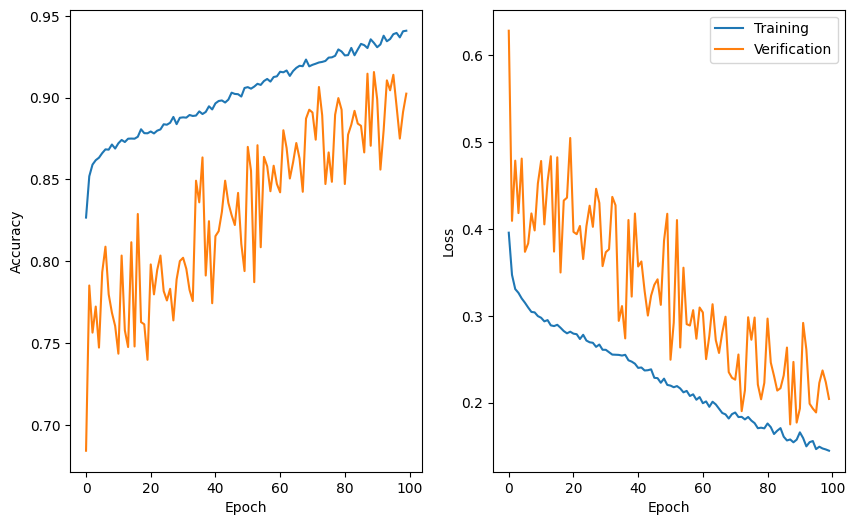

119/119 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.8559
64 nodes,  dropout 0, lr0.005, batch size 128


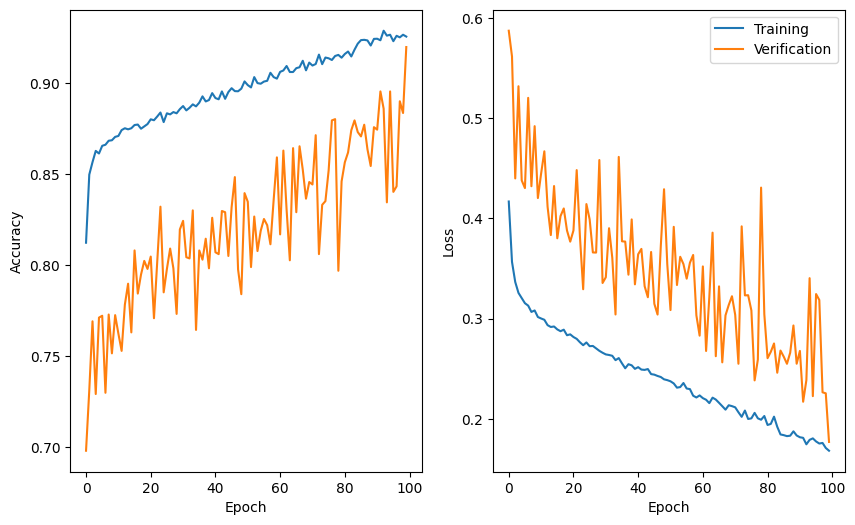

119/119 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8507
64 nodes,  dropout 0, lr0.001, batch size 32


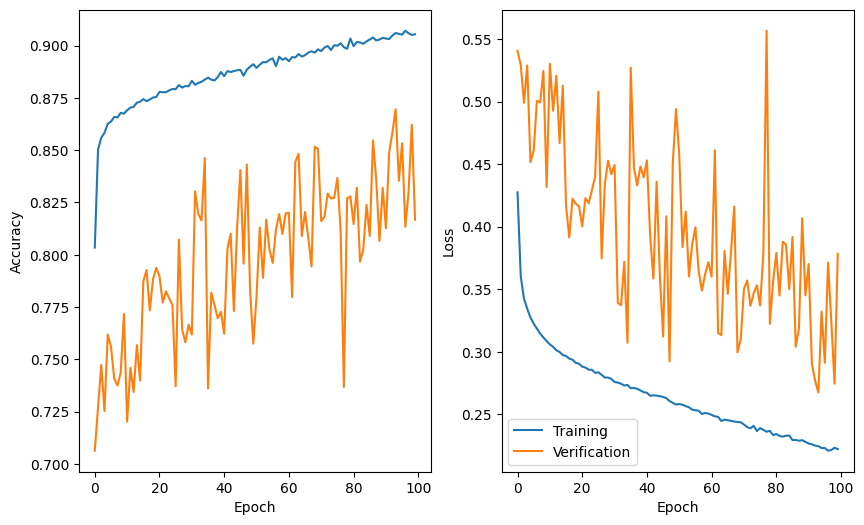

119/119 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8636
64 nodes,  dropout 0, lr0.001, batch size 64


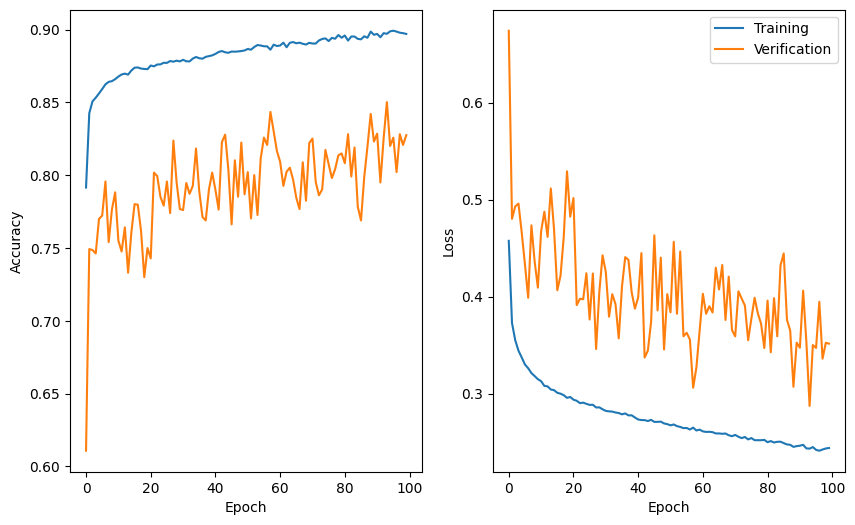

119/119 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8630
64 nodes,  dropout 0, lr0.001, batch size 128


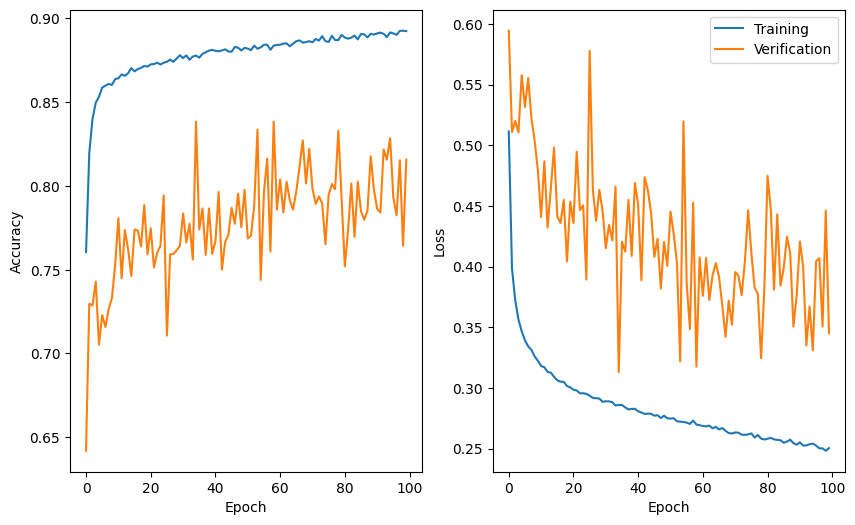

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8717
64 nodes,  dropout 0.2, lr0.1, batch size 32


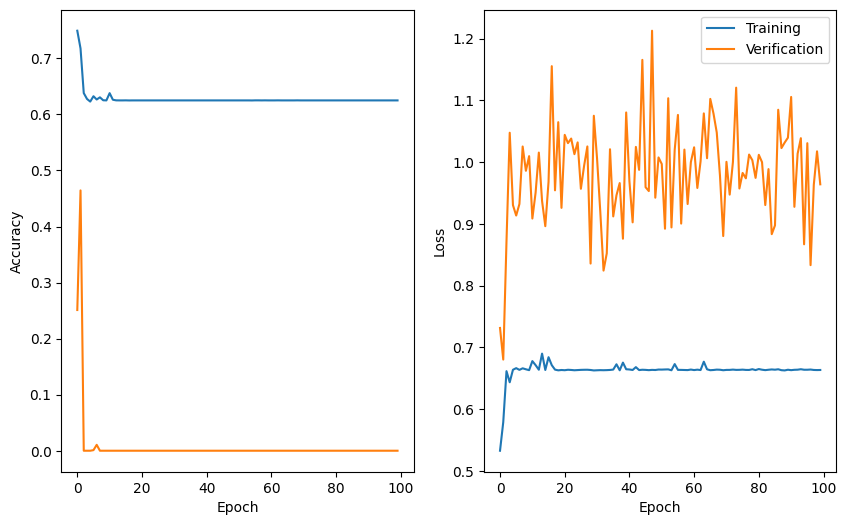

119/119 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6485
64 nodes,  dropout 0.2, lr0.1, batch size 64


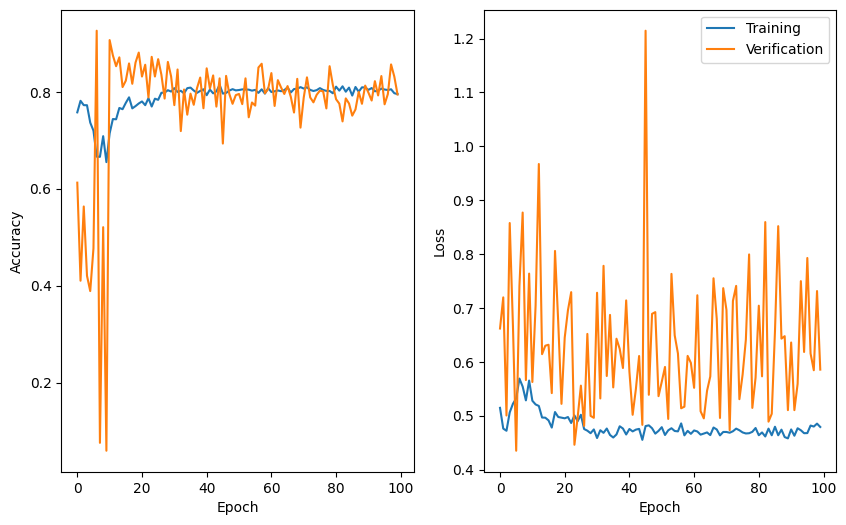

119/119 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8139
64 nodes,  dropout 0.2, lr0.1, batch size 128


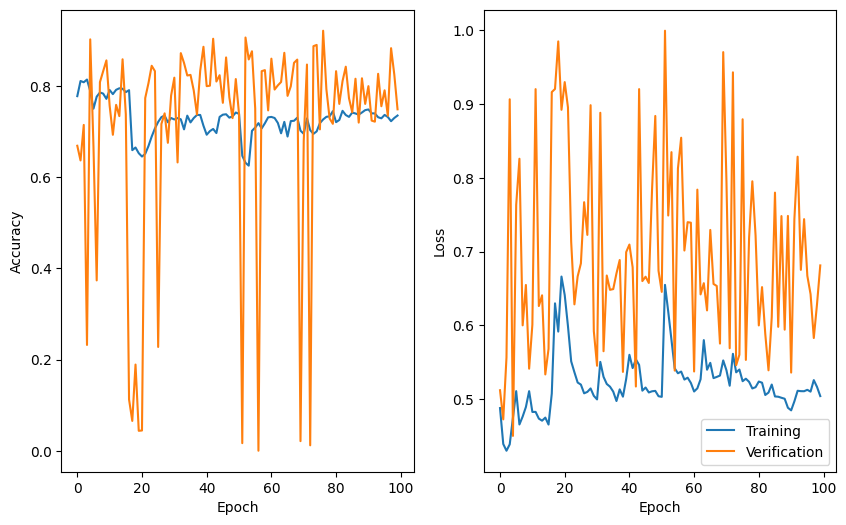

119/119 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8420
64 nodes,  dropout 0.2, lr0.005, batch size 32


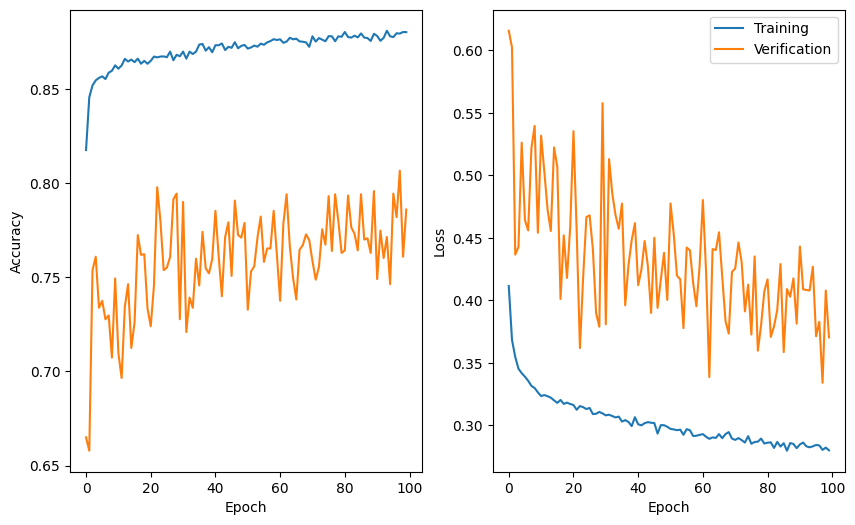

119/119 [==============================] - 0s 3ms/step - loss: 0.3135 - accuracy: 0.8767
64 nodes,  dropout 0.2, lr0.005, batch size 64


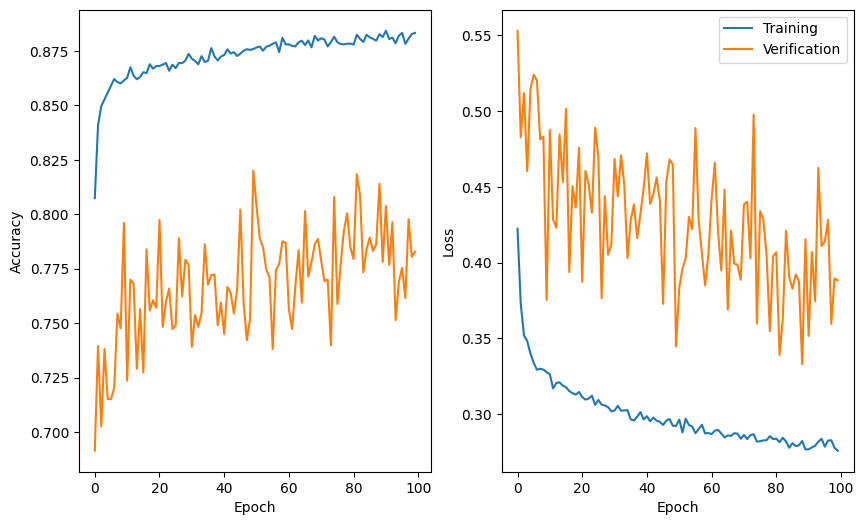

119/119 [==============================] - 0s 2ms/step - loss: 0.3035 - accuracy: 0.8767
64 nodes,  dropout 0.2, lr0.005, batch size 128


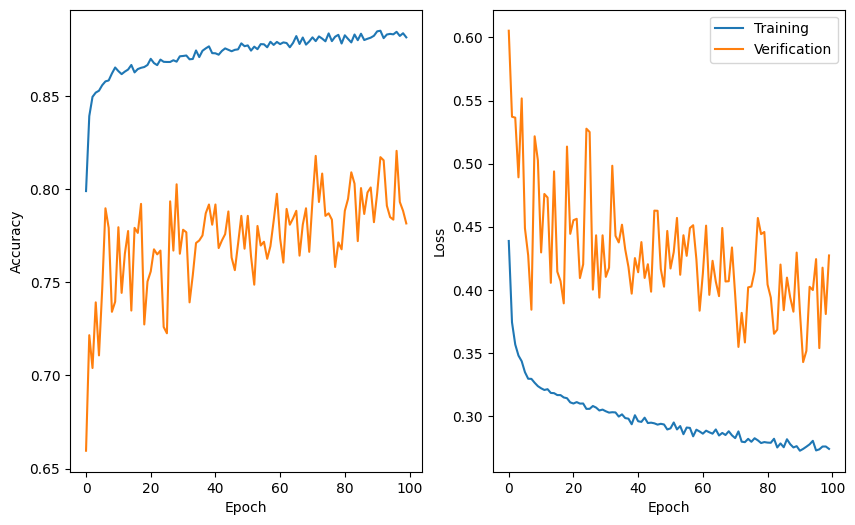

119/119 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8791
64 nodes,  dropout 0.2, lr0.001, batch size 32


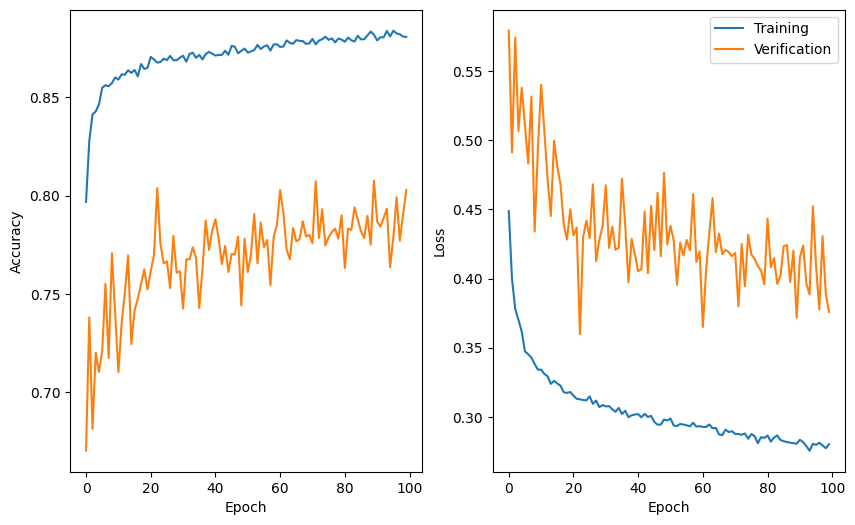

119/119 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.8762
64 nodes,  dropout 0.2, lr0.001, batch size 64


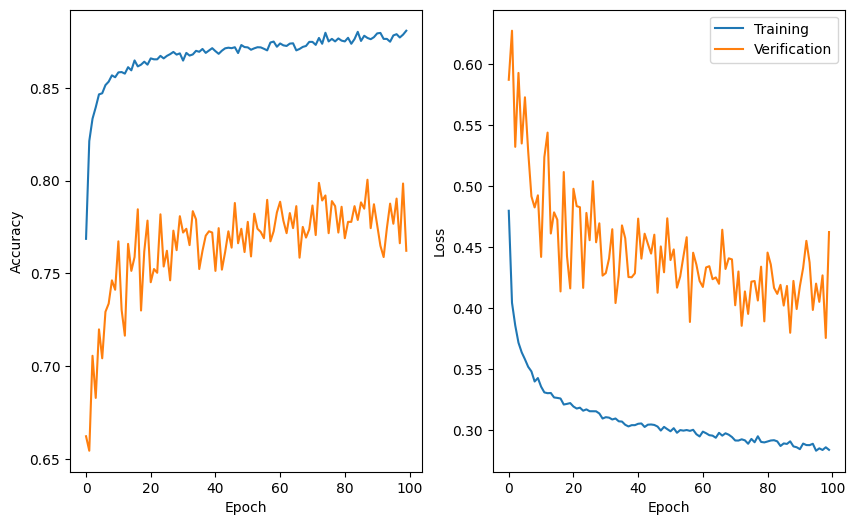

119/119 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8728
64 nodes,  dropout 0.2, lr0.001, batch size 128


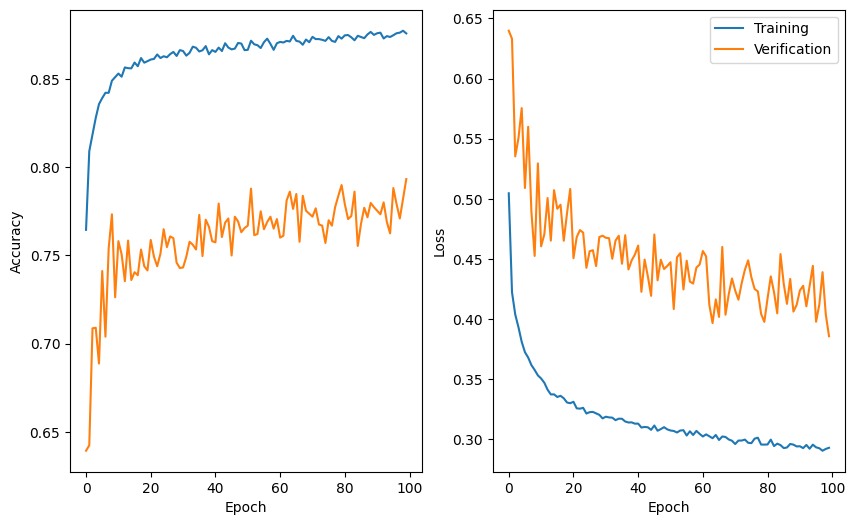

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8712


In [ ]:
from re import X

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes,  dropout {dropout_prob}, lr{lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0] #I have added this zero to extract float from list, otherwise showing error.
          least_loss_model  = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


119/119 [==============================] - 1s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      1319
           1       0.88      0.94      0.91      2485

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

